## Assignment 1 (Visualisasi)

### Isma - KS011 - 008

#### Python for Data Science - Studi Independen - kampus Merdeka

List yang diselesaikan dari kode.id:
1. Area plot

2. Histogram

3. Bar Chart

4. Pie Chart

5. Box Plot

6. Word Cloud

7. Folium Maps

8. Analisis

## Hal yang pertama dilakukan yaitu mengimport semua library yang akan digunakan 

In [4]:
import pandas as pd
import numpy as np
import folium
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
print('succes!!')

succes!!


## Eksplore dataset

Mengimport Dataset yang akan digunakan serta meng explore data untuk dianalisis

In [5]:
df = pd.read_csv("london_crime_by_lsoa.csv") #untuk membaca dataset
df.head()# untuk menampilkan 5 teratas dataset

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
df.tail() #untuk menampilkan 5 baris terbawah dari data set

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [7]:
df.index.values #untuk melihat index list dalam dataset

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
df.columns.values #untuk melihat header kolom dalam dataset

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [9]:
df.info() # untuk melihat info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
df.describe() #untuk melihat descripsi dari dataset

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
df.shape #untuk melihat shape dari dataset

(13490604, 7)

dari data yang telah ditampilkan diatas dapat dianalisiskan bahwa dataset mempunyai 7 kolom dan 13490604 baris. dan terdapat 3 kolom bertype int


Selanjutnya akan dilakukan pengecekan nilai yang hilang

In [12]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Pre-processing dan Visualisasi dataset

 ### 1. Area Plot


wilayah yang mempunyai kasus kejahatan tertinggi adalah?



Processing Data

In [13]:
major_category = df[{'major_category'}] #untuk melihat data pada major kategory
major_category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7136\760547322.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  major_category = df[{'major_category'}] #untuk melihat data pada major kategory


,major_category
0,Burglary
1,Violence Against the Person
2,Violence Against the Person
3,Burglary
4,Robbery
...,...
13490599,Criminal Damage
13490600,Robbery
13490601,Burglary
13490602,Robbery


In [14]:
minor_category = df[{'minor_category'}] #untuk melihat data pada minor kategory
minor_category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7136\3397136385.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  minor_category = df[{'minor_category'}] #untuk melihat data pada minor kategory


,minor_category
0,Burglary in Other Buildings
1,Other violence
2,Other violence
3,Burglary in Other Buildings
4,Personal Property
...,...
13490599,Criminal Damage To Dwelling
13490600,Personal Property
13490601,Burglary in a Dwelling
13490602,Business Property


In [15]:
df.groupby('major_category').value.sum().sort_values(ascending = False) #untuk mengelompokkan menggunakan .groupby(). dan menambahkan fungsi sum() untuk menjumlahkan semua kasus kriminal pada kolom major_category. dan melakukan sorting secara descending (dari besar ke kecil)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

Dari data diatas dapat dilihat bahwa kasus criminal tertinggi yaitu theft and handling, 

In [16]:
theft = df[df.major_category == 'Theft and Handling'] #untuk melihat kasus theft and handling 
theft 

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,E01001985,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...,...
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,E01004531,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


In [17]:
wilayah = theft.groupby('borough').value.sum().sort_values(ascending=False) #untuk mencari wilayah
wilayah

borough
Westminster               277617
Camden                    140596
Lambeth                   114899
Southwark                 109432
Islington                 107661
Newham                    106146
Kensington and Chelsea     95963
Ealing                     93834
Wandsworth                 92523
Croydon                    91437
Hackney                    91118
Tower Hamlets              87620
Barnet                     87285
Hammersmith and Fulham     86381
Haringey                   83979
Hillingdon                 80028
Waltham Forest             77940
Brent                      72523
Redbridge                  71496
Lewisham                   70382
Enfield                    70371
Hounslow                   70180
Bromley                    69742
Greenwich                  64923
Havering                   52609
Barking and Dagenham       50999
Merton                     44128
Richmond upon Thames       40858
Harrow                     40800
Bexley                     40071
Su

Visualisasi Data

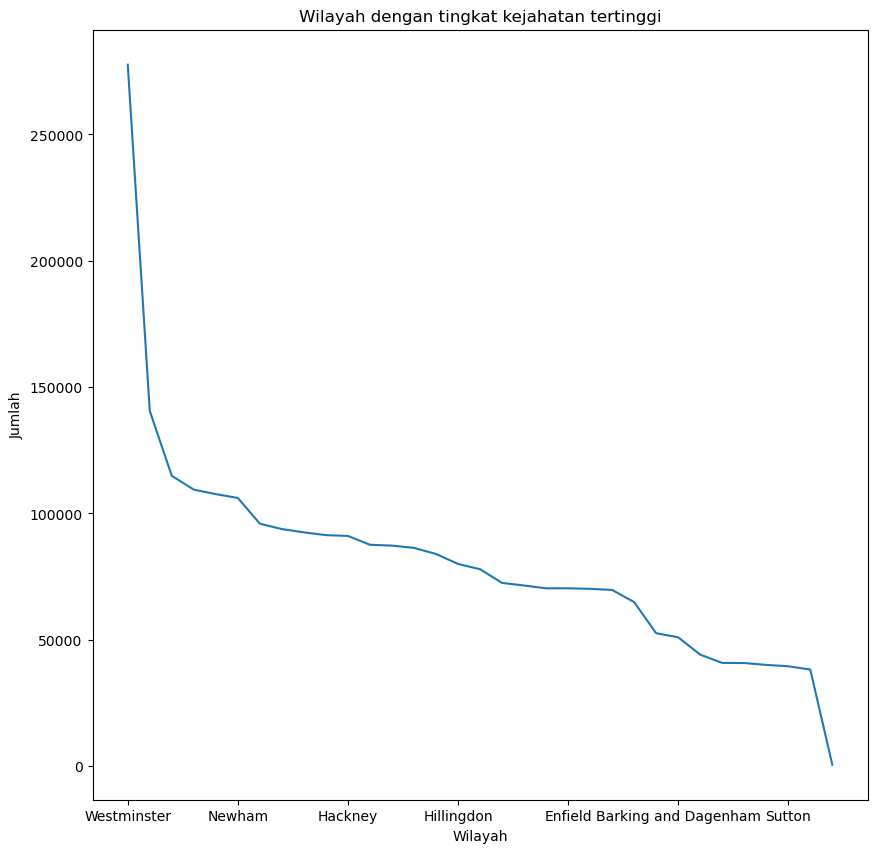

In [18]:
wilayah.plot(kind='line', figsize=(10, 10))
plt.title('Wilayah dengan tingkat kejahatan tertinggi')
plt.ylabel('Jumlah')
plt.xlabel('Wilayah')
plt.show()

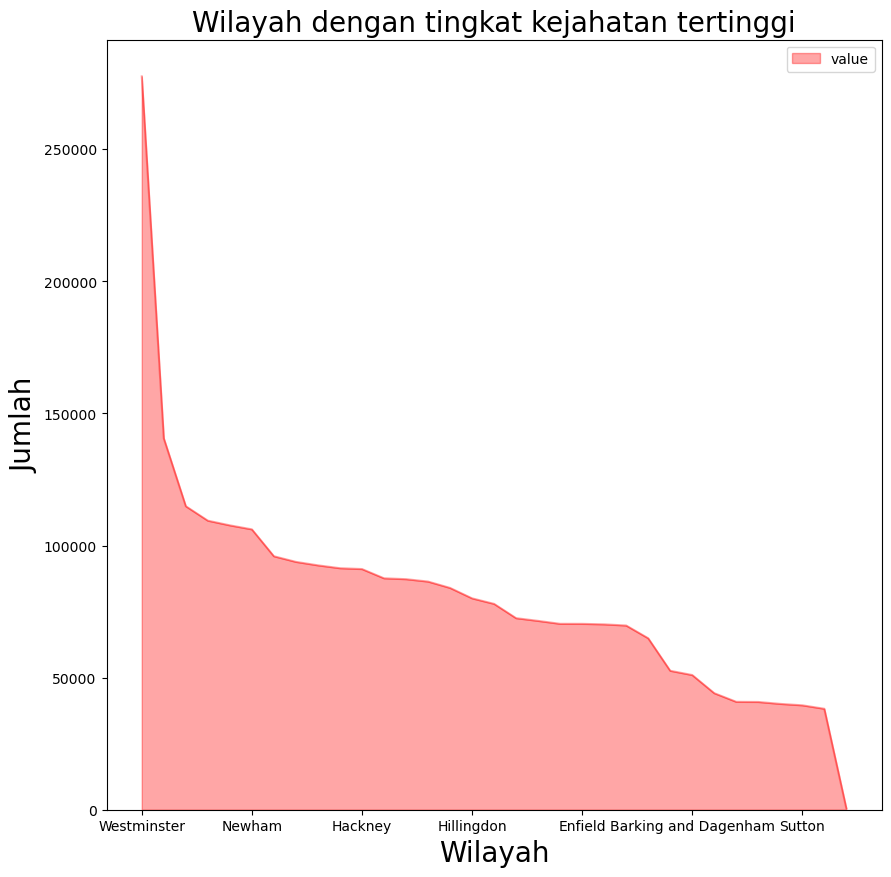

In [19]:
color = ['red']
wilayah.plot(kind='area', figsize=(10,10), stacked = False, alpha=0.35,color=color)
plt.title('Wilayah dengan tingkat kejahatan tertinggi', fontsize = 20)
plt.xlabel('Wilayah', fontsize=20)
plt.ylabel('Jumlah', fontsize=20)
plt.legend()
plt.show()

Dari Area plot diatas dapat dianalisiskan bahwa area dengan tingkat kejahatan tertinggi berada pada wilayah Westminster yang mencapai 277617 dengan jenis kejahatan 'Theft and handling'

### 2. Histogram

Questions : distribusi 10 besar kasus kriminal dari wilayah London pada tahun 2008-2013?

Processing data 

In [20]:
histogram = df[df['year'] <= 2012]
histogram

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
13,E01004547,Wandsworth,Violence Against the Person,Offensive Weapon,0,2011,10
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


Visualisasi Data

In [21]:
histogram = histogram.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
histogram['Total'] = histogram.sum(axis=1)
histogram.sort_values(['Total'], ascending=False, axis=0, inplace=True)
histogram_top10 = histogram.drop('Total', axis=1, inplace=True)
histogram_top10 = histogram.head(n=10).transpose()
histogram_top10

borough,Westminster,Lambeth,Camden,Southwark,Croydon,Ealing,Newham,Brent,Islington,Lewisham
year,,,,,,,,,,
2008,47846,31717,32010,33470,29516,28947,29752,23504,26273,27054
2009,48456,31225,31612,30623,29784,28617,28610,24748,25485,25182
2010,48116,31671,31804,31320,29373,31360,30728,25512,24693,24532
2011,54243,33224,33956,30723,29830,29537,27978,27669,24980,24201
2012,59226,33473,31472,30737,30189,28832,30067,26357,26268,23652


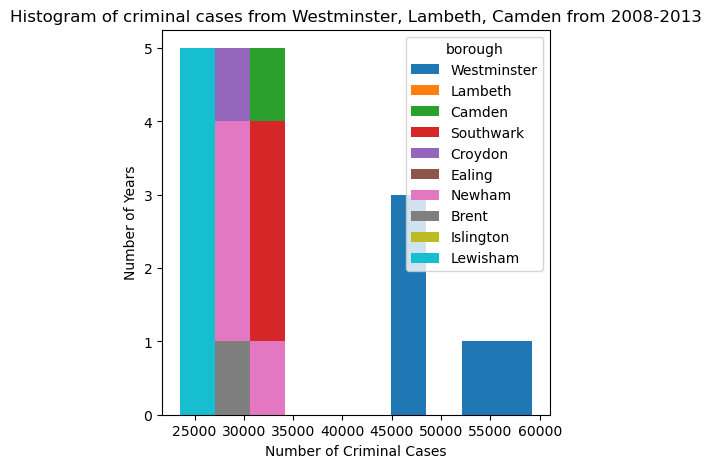

In [22]:
histogram_top10.plot(kind ='hist', figsize = (5, 5))

plt.title('Histogram of criminal cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

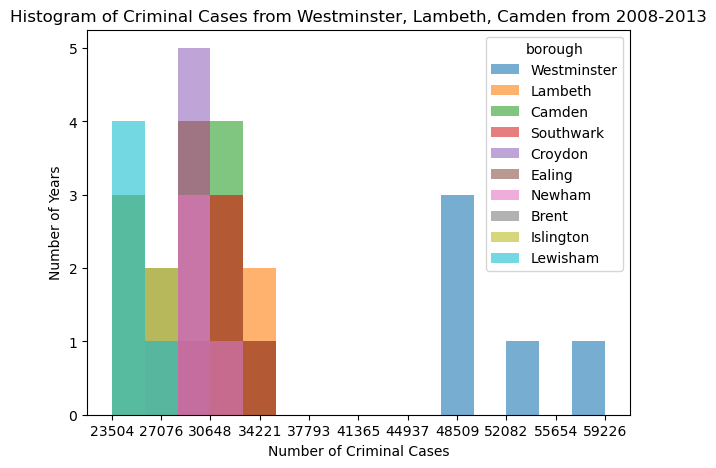

In [23]:
count, bin_edges = np.histogram(histogram_top10, 10)
histogram_top10.plot(kind ='hist', 
          figsize=(7, 5),
          bins=15,
          alpha=0.6,
          xticks=bin_edges
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

Dari histogram di atas, kita dapat menyimpulkan bahwa distribusi frekuensi kasus kriminal Westminster cenderung menyebar daripada 9 wilayah lainnya.

### 3. Bar Chart

Questions : 3 besar dari total kasus kriminal pada wilayah negara london tahun 2008-2016

Processing Data

In [24]:
barh_top3 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
barh_top3['Total'] = barh_top3.sum(axis=1)
barh_top3.sort_values(['Total'], ascending=False, axis=0, inplace=True)
barh_top3 = barh_top3['Total'].head(n=3)
barh_top3

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Name: Total, dtype: int64

Visualisasi Data

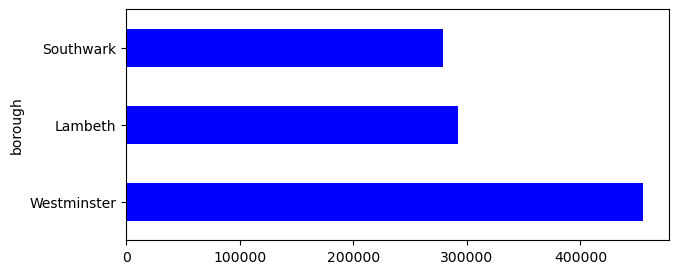

In [25]:
barh_top3.plot(kind='barh', figsize=(7, 3), stacked=True, color='blue')
plt.show()

Dari plot bar diatas dapat dianalisiskan bahwa Westminster memiliki total kasus kriminal tertinggi, dan diikuti oleh Lambeth dan Southwark

### 4. Pie Chart 

Bagaimana persentase kategori wilayah kriminal yang terjadi di negara london?

Processing data

In [26]:
pie = df['borough'].value_counts()
pie

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

Visualisasi Data

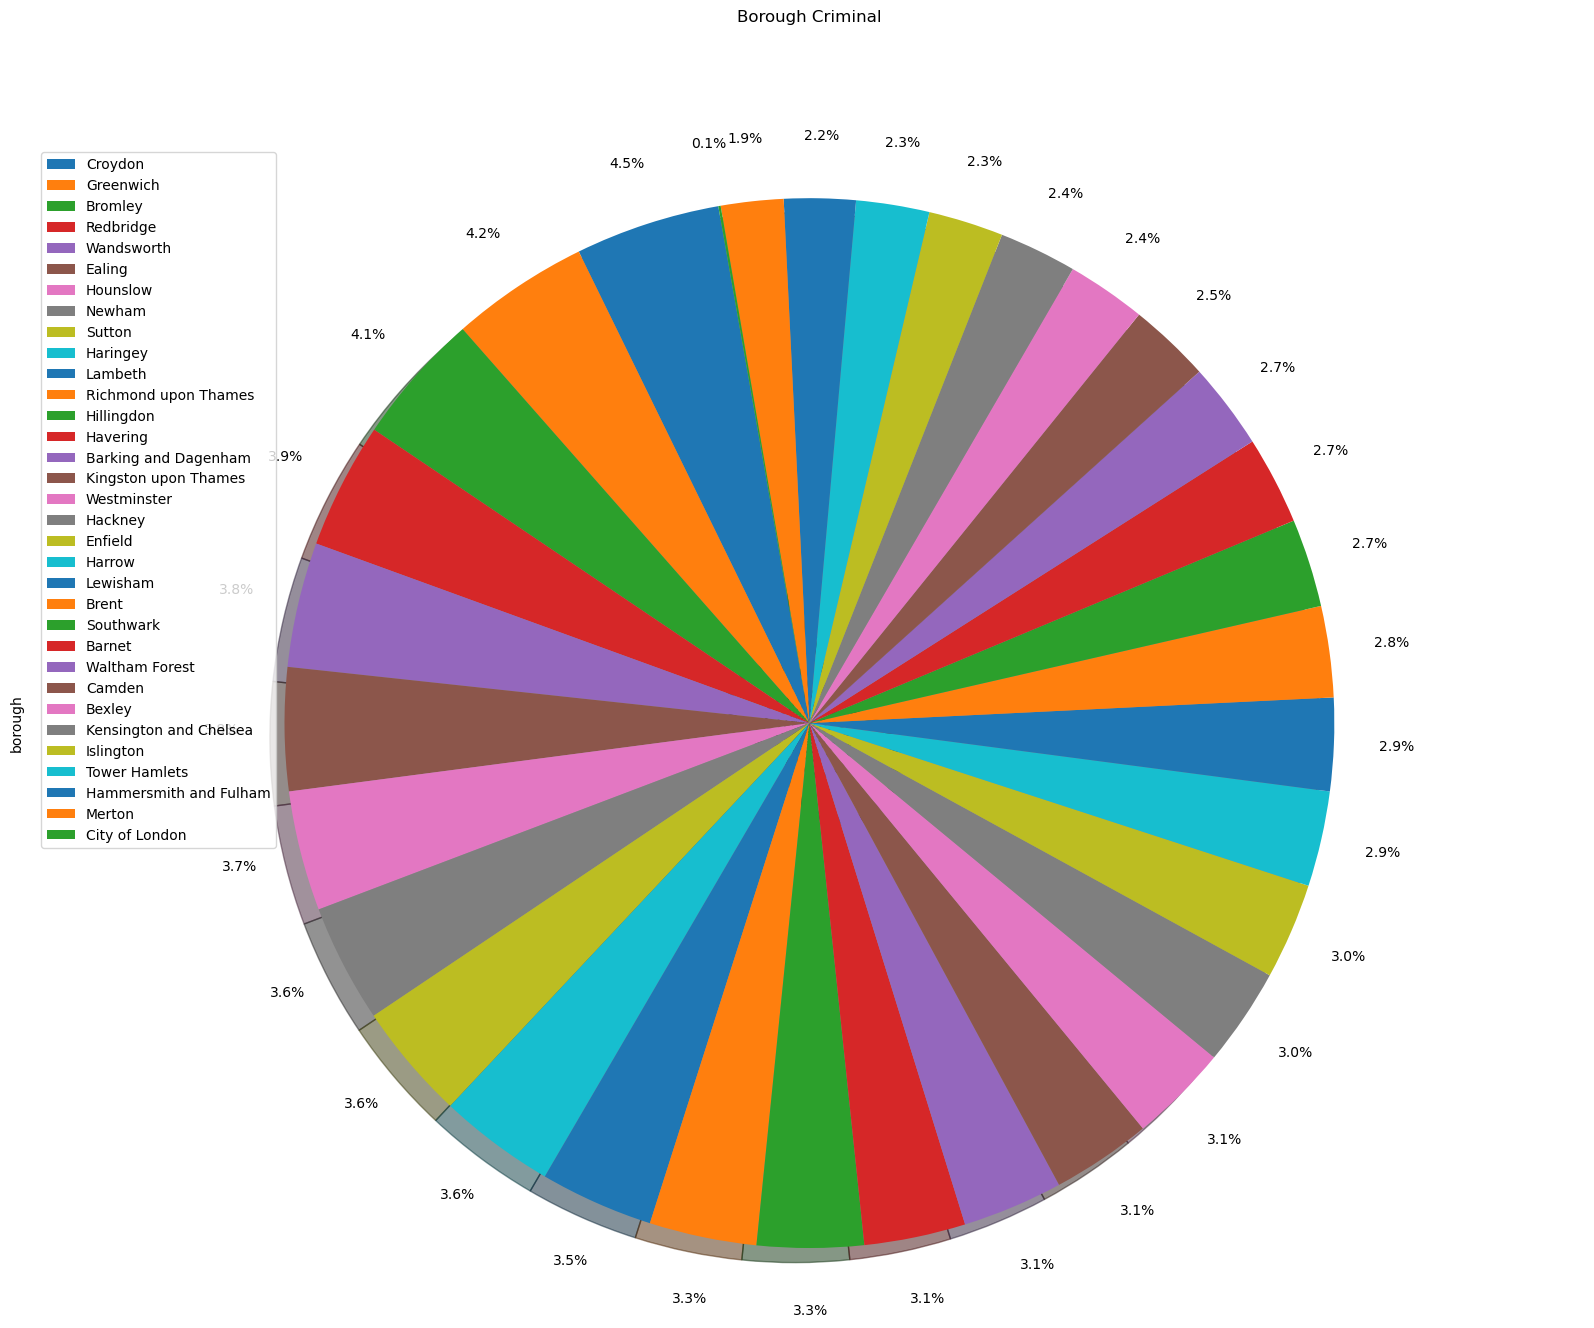

In [27]:
pie.plot(kind = 'pie',
           figsize =(20, 15),
          autopct = '%1.1f%%',
          startangle = 100,
          shadow = True,
          labels = None,
          pctdistance = 1.12
          )
plt.title('Borough Criminal', y = 1.10)

plt.axis('equal')
plt.legend(labels = df['borough'].unique(), loc = 'upper left') 
plt.show()

Dari area plot diatas dapat dianalisiskan bahwa kejahatan pada wilayah london tidak jauh berbeda

### 5. Box Plot

Question : total kasus kriminal di setiap tahun (borough)

Processing data

In [28]:
box = df.pivot_table(index = 'borough', columns = 'year', values = 'value', aggfunc=sum)
box.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Visualisasi Data

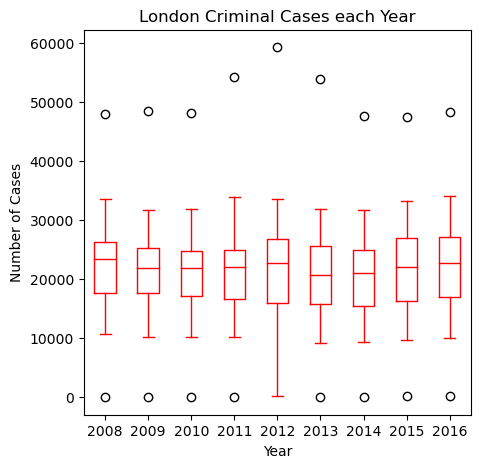

In [29]:
box.plot(kind = 'box',
       figsize = (5, 5),
       color = 'Red',
       vert = True)

plt.title('London Criminal Cases each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

dari boxplot diatas dapat dianalisiskan bahwa, terlihat bahwa persebaran total kasus pada setiap tahunnya hampir sama, namun pada tahun 2012 persebarannya lebih luas.

### 6.  Folium Maps

membuat maps wilayah croydon dan membuat peta tipe stamen terrain

In [30]:
world_map = folium.Map(location = [51.3680795, -0.15166711199], zoom_start=15)
world_map

In [31]:
world_map = folium.Map(location=[51.3680795, -0.15166711199], zoom_start=17, tiles='Stamen Terrain')

world_map

### 7. Word Clouds

questions: kata yang sering muncul pada kasus kriminal

In [32]:
london = df.minor_category.value_counts()
london

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

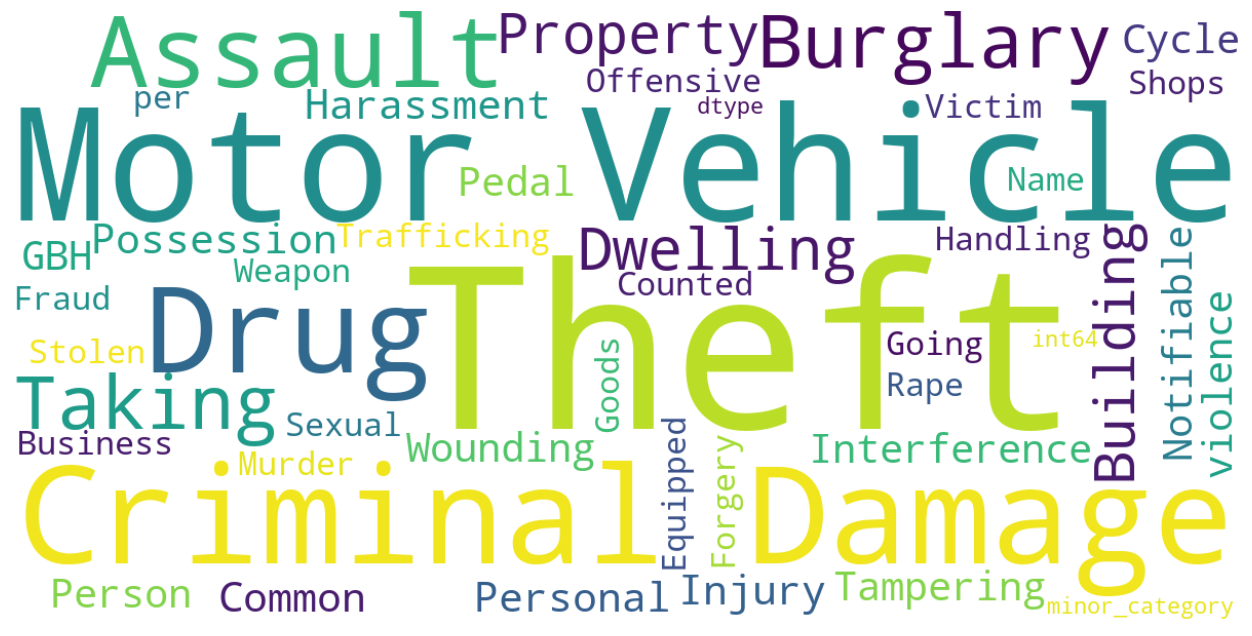

In [33]:
stopwords = set(STOPWORDS)
wc_london = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords)
wc_london.generate(str(london))

plt.figure(figsize=(16, 8))
plt.imshow(wc_london, interpolation='bilinear')
plt.axis('off')
plt.show()


dari word cloud diatas dapat dianalisiskan bahwa "criminal", theft, Motor, vehichle dan damage" memiiki ukursn yang besar dibanding yang lainnya, maka dapat disimpulkan bahwa kriminal tersebut yang terjadi. 

## Kesimpulan

1. dataset "London_crime_by_lsoa (https://www.kaggle.com/datasets/jboysen/london-crime)", mempunyai 7 kolom dan 13490604 baris. dan terdapat 3 kolom bertype int

2. area dengan tingkat kejahatan tertinggi berada pada wilayah Westminster yang mencapai 277617 dengan jenis kejahatan 'Theft and handling'

3.  distribusi frekuensi kasus kriminal Westminster cenderung menyebar daripada 9 wilayah lainnya.

4. persentase kejahatan pada wilayah london tidak jauh berbeda

5. persebaran total kasus pada setiap tahunnya hampir sama, namun pada tahun 2012 persebarannya lebih luas.

6. "criminal", theft, Motor, vehichle dan damage" memiiki ukursn yang besar dibanding yang lainnya, maka dapat disimpulkan bahwa kriminal tersebut yang terjadi.